# Løsning av Laplacelikning med Jacobi-iterasjoner

In [7]:
@jit
def solvepoisson(b,niter):
    # b: matrise med randverdier, nan hvor vi skal finne V
    # niter: antall iterasjoner
    # V: returnerer potensialet
    V = b.copy()
    for i in range(len(V.flat)):
        if (np.isnan(b.flat[i])):
            V.flat[i] = 0.0
    Vnew = V.copy()
    Lx = b.shape[0]
    Ly = b.shape[0]
    for n in range(niter):
        for ix in range(Lx):
            for iy in range(Ly):
                if (np.isnan(b[ix,iy])):
                    Vnew[ix,iy] = (V[ix+1,iy]+V[ix-1,iy]+V[ix,iy+1]+V[ix,iy-1])/4
        V,Vnew = Vnew,V
    return V

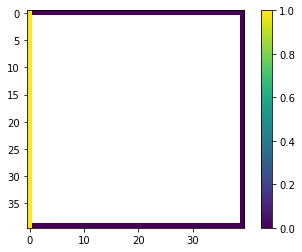

In [8]:
# Definere randverdier
L = 40
b = np.zeros((L,L))
b[:] = np.float('nan')

b[0,:] = 0.0
b[L-1,:] = 0.0
b[:,0] = 1.0
b[:,L-1] = 0.0

plt.imshow(b)
plt.colorbar()

In [9]:
V = solvepoisson(b,2000)

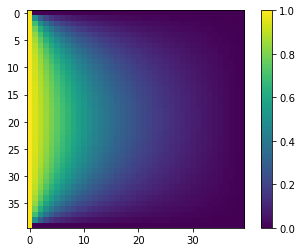

In [10]:
plt.imshow(V)
plt.colorbar()

(0.0, 39.0, 0.0, 39.0)

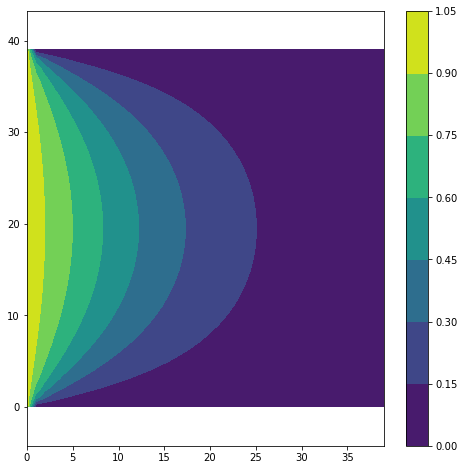

In [11]:
plt.figure(figsize=(8,8))
plt.contourf(V)
plt.colorbar()
plt.axis('equal')

(0.0, 39.0, 0.0, 39.0)

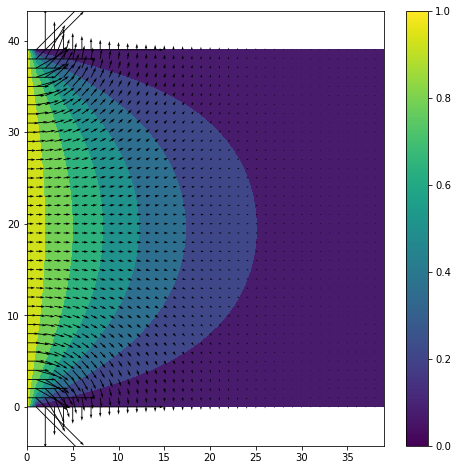

In [12]:
plt.figure(figsize=(8,8))
Ey,Ex = np.gradient(-V)
x = np.linspace(0,L-1,L)
y = np.linspace(0,L-1,L)
rx,ry = np.meshgrid(x,y)
plt.contourf(rx,ry,V)
plt.quiver(rx,ry,Ex,Ey)
plt.colorbar()
plt.axis('equal')